In [ ]:
# !pip install simpy 

In [1]:
import simpy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
class Simulator(object):
    def __init__(self, env1):
        self.env = env1
        self.matrix  = np.empty(shape=(501, 501))
        # pixel value 255 = white
        self.matrix.fill(255)
        self.matrix[250][250] = 0
        self.count = 0
        self.stickiness = 0.02
        
    def aggregation(self, r, c ):
        flag = True
        i = r
        j = c
        while(flag):
            side = ['left', 'right', 'top', 'bottom']
            sideSelected = np.random.choice(side, 1, p=[0.25, 0.25, 0.25, 0.25])[0]
            if sideSelected == "left":
                column = j-1
                row = i
            elif sideSelected == "right":
                column = j+1
                row = i
            elif sideSelected == "top":
                column = j
                row = i-1
            else:
                column = j
                row = i+1
            if row == -1:
                row = 500
            elif row == 501: 
                row = 0
            if column == -1:
                column = 500
            elif column == 501:
                column = 0
            if 0 <= column <= 500 and 0 <= row <= 500 and self.matrix[row][column] == 0:
                prob = np.random.uniform(0.0, 1.0)
                # print("prob ", prob)
                if prob <= self.stickiness:
                    flag = False
            elif 0 <= column <= 500 and 0 <= row <= 500 and self.matrix[row][column] != 0: 
                self.matrix[i][j] = 255
                self.matrix[row][column] = 0
                i = row
                j = column
                self.count += 1
            
            
    def pixelSelection(self):
        side = ['left', 'right', 'top', 'bottom']
        sideSelected = np.random.choice(side, 1, p=[0.25, 0.25, 0.25, 0.25])[0]
        row = -1 
        column = -1
        remainingIndex = np.random.randint(0,500) 
        if sideSelected == "left":
            column = 0
            row = remainingIndex
        elif sideSelected == "right":
            column = 500
            row = remainingIndex
        elif sideSelected == "top":
            column = remainingIndex
            row = 0
        else:
            column = remainingIndex
            row = 500
        return row, column
    
    def diffusion(self, tick):
        while True:
            row, column = self.pixelSelection()
            self.matrix[row][column] = 0
            self.aggregation(row, column)
            print(row, column, self.env.now)
#             print("count ", self.count )
            yield self.env.timeout(tick)
    
    def printMatrix(self):
        print ("Matrix: ", self.matrix)
        global globalMatrix 
        globalMatrix = self.matrix
        fig = plt.figure(figsize=(6, 12))

        ax = fig.add_subplot(111)
        ax.set_title('colorMap')
        plt.imshow(self.matrix)
        ax.set_aspect('equal')

        cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
        cax.get_xaxis().set_visible(False)
        cax.get_yaxis().set_visible(False)
        cax.patch.set_alpha(0)
        cax.set_frame_on(False)
        plt.colorbar(orientation='vertical')
        plt.show()
#         img = Image.fromarray(self.matrix, 'L')
#         img.show()

envObject2 = simpy.Environment()

In [12]:
globalMatrix = None
obj2 = Simulator(envObject2)
obj2.env.process(obj2.diffusion(1))

<Process(diffusion) object at 0x7fb0f056f250>

In [ ]:
N = 500
obj2.env.run(until=N)


0 104 0
191 500 1
29 0 2
0 337 3
488 0 4
0 361 5
71 500 6
500 222 7
0 89 8
500 193 9
0 396 10
0 354 11
0 244 12
36 0 13
70 0 14
0 334 15
500 65 16
0 277 17
0 460 18
100 500 19
500 475 20
500 125 21
499 0 22
0 393 23
377 0 24
351 0 25
0 7 26
500 124 27
449 500 28
310 500 29
0 289 30
0 295 31
0 109 32
309 0 33
374 500 34
500 394 35
0 267 36
205 0 37
31 500 38
115 500 39
0 194 40
421 0 41
349 500 42
439 0 43
464 0 44
335 0 45
0 367 46
257 0 47
12 500 48
0 418 49
500 30 50
181 0 51
500 380 52
500 36 53
0 397 54
0 385 55
405 0 56
485 0 57
420 0 58
378 0 59
328 0 60
500 348 61
425 500 62
0 128 63
427 0 64
500 168 65
0 427 66
19 500 67
363 500 68
500 244 69
20 0 70
0 473 71
204 500 72
337 0 73
500 454 74
398 0 75
0 274 76
270 500 77
500 219 78
0 470 79
0 20 80


Matrix:  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


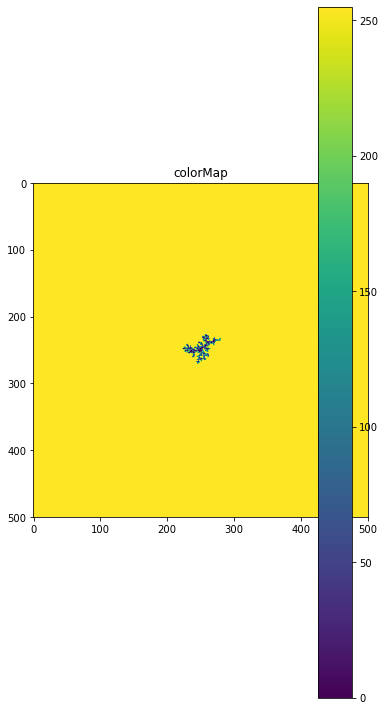

In [5]:
obj2.printMatrix()

In [6]:
print("globalMatrix ", globalMatrix)

globalMatrix  [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [7]:
from numpy import asarray
from numpy import save

# save to npy file, add a README for N and stickiness
save('/Users/shreyajain/MLAdhocProjects/locus/data/3/matrix.npy', globalMatrix)

# load numpy array from npy file
from numpy import load

globalMatrix2 = load('/Users/shreyajain/MLAdhocProjects/locus/data/3/matrix.npy')

print(globalMatrix2)


[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [8]:
class Stickiness(object):
    def __init__(self):
        self.matrix = globalMatrix2
        self.stride = 0
        self.height = self.matrix.shape[0]
        self.width = self.matrix.shape[1]
        self.filter_size = 3
        self.size = 501


    def traversal(self):
        r1 = 0
        r2 = r1 + self.filter_size 
        c1 = 0
        c2 = c1 + self.filter_size 
        density = 0 
        print ("self.matrix ", self.matrix.shape)
        while(c2 <= self.height and r2 <= self.width):
            tempArray = self.matrix[r1:r2 ,  c1:c2]
            count = 0 
            for x in range(0, self.filter_size):
                for y in range(0, self.filter_size):
                    if tempArray[x,y] == 0:
                        count += 1
                        # print ("count ", count)
            density += count/float(self.filter_size*self.filter_size)
            r1 += 1
            r2 += 1
            c1 += 1
            c2 += 1
        
        total_filters = (self.size - self.filter_size -1)*(self.size - self.filter_size -1)
        average_density = density/total_filters
        print ("average_density ", average_density)
        
        

objStickiness2 = Stickiness()

In [9]:
objStickiness2.traversal()

self.matrix  (501, 501)
average_density  4.318331180915135e-05


In [ ]:
self.matrix  (501, 501)
average_density  4.993070427933126e-05